In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

El dataset tiene las 14 tareas de las sessiones 1-12 y contesta las preguntas:

- Does  Person  A  believe  s/he  is  better  than  his/her  partner?
- Does  Person  B  believe  s/he  is  better  than  his/her  partner?
- Is Person A bored  with  the  game? 
- Is Person B bored  with  the  game?
- Does Person A make  it  difficult  for  his/her  partner  to  speak?
- Does Person B make  it  difficult  for  his/her  partner  to  speak?
- Is Person A directing  the  conversation?  
- Is Person B directing  the  conversation?
- Does Person A seem to be doing a good job contributing to successful completion?
- Does Person B seem to be doing a good job contributing to successful completion?
- Is Person A frustrated  with  his/her  partner?  
- Is Person B frustrated  with  his/her  partner?  
- Is Person A frustrated  with  the game?  
- Is Person B frustrated  with  the game?  
- Is Person A engaged  with  the game?  
- Is Person B seem engaged  with  the game?  
- Is Person A encouraging  his/her  partner?  
- Is Person B encouraging  his/her  partner?  
- Is Person A making  him/herself clear? 
- Is Person B making  him/herself clear? 
- Is Person A planning what s/he is going to say?
- Is Person B planning what s/he is going to say?
- Is Person A polite?
- Is Person B polite?
- Does Person A seem to dislike his/her partner? 
- Does Person B seem to dislike his/her partner? 
- Is Person A trying  to  be  liked?  
- Is Person B trying  to  be  liked?  
- Is Person A trying  to  dominate  the  conversation?
- Is Person B trying  to  dominate  the  conversation?
- Is  the  conversation   awkward?   
- Does the conversation flow   naturally?   
- Are   the   participants  having  trouble  understanding  each  other?  
- Which  person  do  you  like  more? (A = 5 / B = 0)
- Who  would  you  rather  have  as  a  partner? (A = 5 / B = 0)

In [2]:
df = pd.read_csv("../../data/games_uba/dialogues_with_tt_and_social_variables.csv")

for session in df.session.unique():
    print(f"There are {len(df[df.session == session])} tasks in session {session}.")

There are 14 tasks in session 1.
There are 14 tasks in session 2.
There are 14 tasks in session 3.
There are 14 tasks in session 4.
There are 14 tasks in session 5.
There are 14 tasks in session 6.
There are 14 tasks in session 7.
There are 14 tasks in session 8.
There are 14 tasks in session 9.
There are 14 tasks in session 10.
There are 14 tasks in session 11.
There are 14 tasks in session 12.


In [4]:
print(" ".join(df.columns))

session task dialogue score time-used believes_is_better_than_partner_A_yes believes_is_better_than_partner_B_yes bored_with_game_A_yes bored_with_game_B_yes difficult_for_partner_to_speak_A_yes difficult_for_partner_to_speak_B_yes directs_the_conversation_A_yes directs_the_conversation_B_yes contributes_to_successful_completion_A_yes contributes_to_successful_completion_B_yes frustrated_with_partner_A_yes frustrated_with_partner_B_yes frustrated_with_game_A_yes frustrated_with_game_B_yes engaged_in_game_A_yes engaged_in_game_B_yes gives_encouragement_A_yes gives_encouragement_B_yes making_self_clear_A_yes making_self_clear_B_yes planning_what_to_say_A_yes planning_what_to_say_B_yes polite_A_yes polite_B_yes dislikes_partner_A_yes dislikes_partner_B_yes trying_to_be_liked_A_yes trying_to_be_liked_B_yes trying_to_dominate_A_yes trying_to_dominate_B_yes conversation_awkward_yes flow_naturally_yes hard_time_understanding_each_other_yes like_more_A rather_have_as_a_partner_A


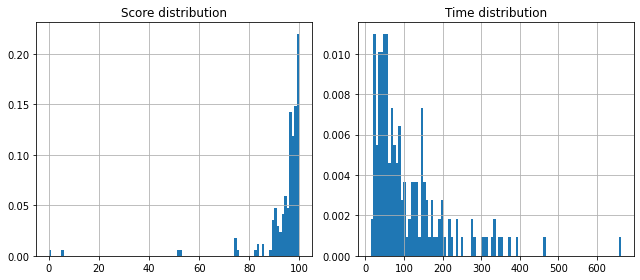

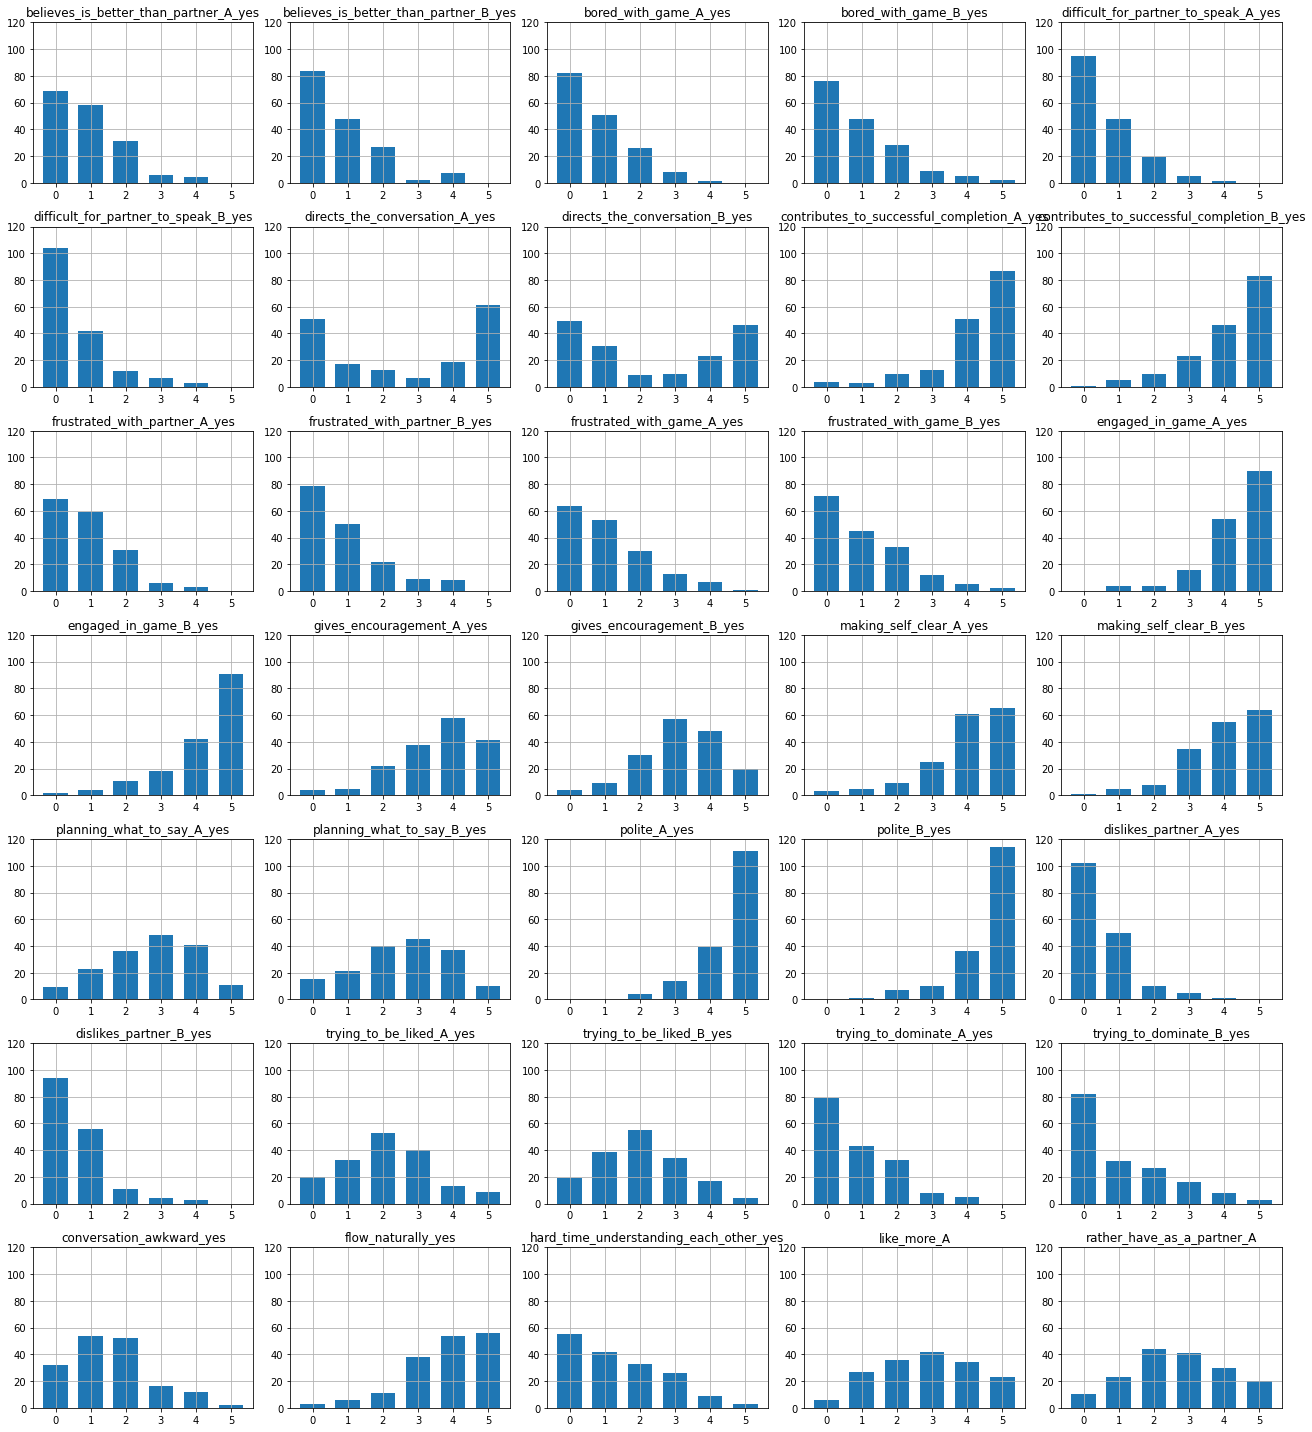

In [3]:
fig, ax = plt.subplots(1,2,figsize=(9,4))
ax[0].hist(df["score"],bins=100,density=True)
ax[0].set_title("Score distribution")
ax[0].grid(True)

ax[1].hist(df["time-used"],bins=100,density=True)
ax[1].set_title("Time distribution")
ax[1].grid(True)
fig.tight_layout()

fig, ax = plt.subplots(7,5,figsize=(18,20))
for row in range(ax.shape[0]):
    for col in range(ax.shape[1]):
        annotation = df.columns[5 + ax.shape[1] * row + col]
        counts = {i: 0 for i in range(6)}
        for value, count in df[annotation].value_counts().items():
            counts[value] += count
        ax[row,col].bar(counts.keys(),counts.values(),.7)
        ax[row,col].set_title(annotation)
        ax[row,col].grid(True)
        ax[row,col].set_ylim(0,120)

fig.tight_layout()

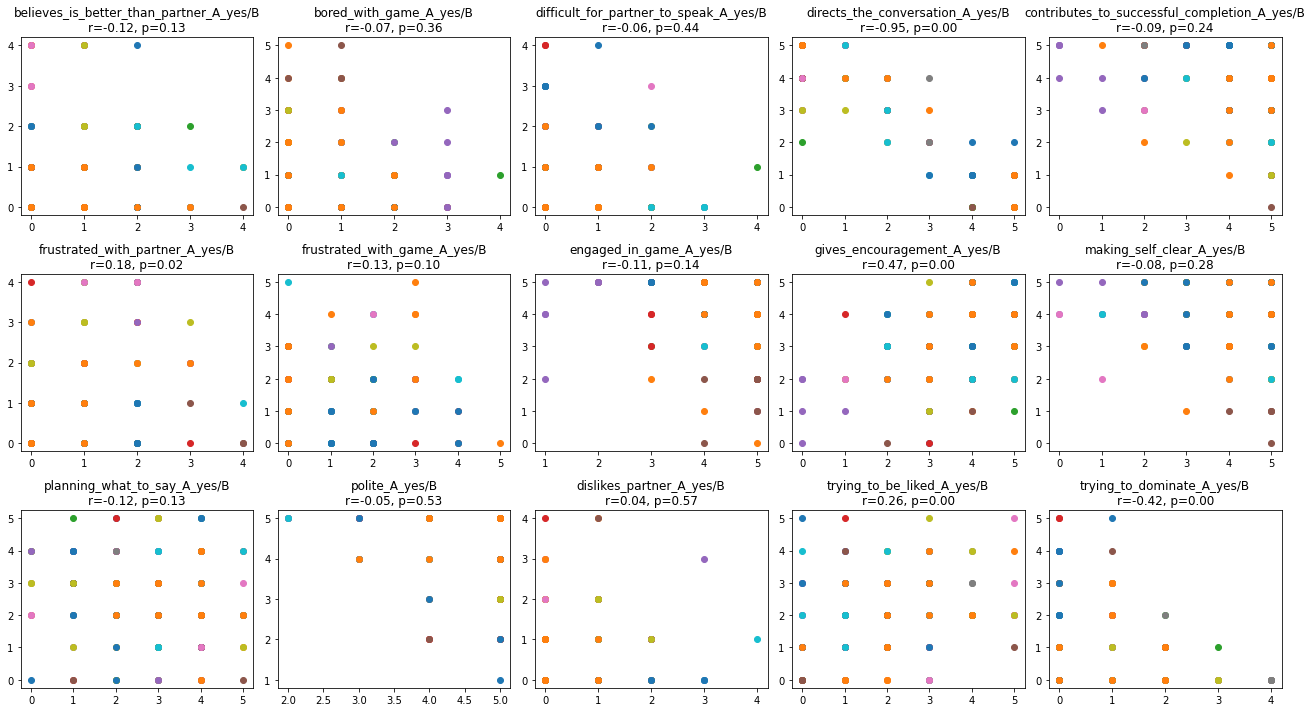

In [8]:
annotation_pairs = [
    ('believes_is_better_than_partner_A_yes','believes_is_better_than_partner_B_yes'),
    ('bored_with_game_A_yes', 'bored_with_game_B_yes'),
    ('difficult_for_partner_to_speak_A_yes', 'difficult_for_partner_to_speak_B_yes'),
    ('directs_the_conversation_A_yes', 'directs_the_conversation_B_yes'),
    ('contributes_to_successful_completion_A_yes', 'contributes_to_successful_completion_B_yes'),
    ('frustrated_with_partner_A_yes', 'frustrated_with_partner_B_yes'),
    ('frustrated_with_game_A_yes', 'frustrated_with_game_B_yes'),
    ('engaged_in_game_A_yes', 'engaged_in_game_B_yes'),
    ('gives_encouragement_A_yes','gives_encouragement_B_yes'),
    ('making_self_clear_A_yes', 'making_self_clear_B_yes'),
    ('planning_what_to_say_A_yes', 'planning_what_to_say_B_yes'),
    ('polite_A_yes', 'polite_B_yes'),
    ('dislikes_partner_A_yes', 'dislikes_partner_B_yes'),
    ('trying_to_be_liked_A_yes','trying_to_be_liked_B_yes'),
    ('trying_to_dominate_A_yes','trying_to_dominate_B_yes')
]

fig, ax = plt.subplots(3,5,figsize=(18,10))
for row in range(ax.shape[0]):
    for col in range(ax.shape[1]):
        ann_A, ann_B = annotation_pairs[ax.shape[1] * row + col]
        for session in range(1,13):
            x = df.loc[df["session"] == session,ann_A]
            y = df.loc[df["session"] == session,ann_B]
            ax[row,col].plot(x,y,'o')
        x, y = df[ann_A].values, df[ann_B].values
        r, p = pearsonr(x,y)
        ax[row,col].set_title(f"{ann_A}/B\nr={r:.2f}, p={p:.2f}")

fig.tight_layout()